In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
happiness_2015 = pd.read_csv("Datasets/World_Happiness_2015.csv")

In [3]:
happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
mapping = {'Economy (GDP per Capita)':"Economy", 'Health (Life Expectancy)':"Health",
          'Trust (Government Corruption)':'Trust'}

In [5]:
happiness_2015.rename(mapping, axis = 1, inplace = True)

In [6]:
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
def category(element):
    if element > 1:
        return "High"
    else:
        return "Low"

1. Series.map()
2. Series.apply()

In [8]:
cat_eco_map = happiness_2015.Economy.map(category)
cat_eco_map.head()

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object

In [9]:
cat_eco_apply = happiness_2015.Economy.apply(category)
cat_eco_apply.head()

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object

In [10]:
def category(element,x):
    if element > x:
        return "High"
    else:
        return "Low"

In [11]:
cat_eco_map = happiness_2015.Economy.map(category,x=1)
cat_eco_map.head()

TypeError: map() got an unexpected keyword argument 'x'

In [12]:
cat_eco_map = happiness_2015.Economy.apply(category,x=1)
cat_eco_map.head()

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object

In [13]:
happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [14]:
cols = ['Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity']

In [15]:
happiness = happiness_2015[cols]
happiness.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


1. df.applymap()

In [16]:
def category(element):
    if element > 1:
        return "High"
    else:
        return "Low"

In [17]:
a = happiness.applymap(category)
a.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


In [18]:
a.apply(pd.value_counts, axis = 0)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


In [19]:
happiness.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [20]:
happiness.sum(axis = 1).head()

0    5.06958
1    4.85891
2    5.03504
3    5.05691
4    4.97518
dtype: float64

In [21]:
happiness.apply(sum, axis = 1).head()

0    5.06958
1    4.85891
2    5.03504
3    5.05691
4    4.97518
dtype: float64

In [22]:
def add(row):
    addition = 0
    for i in row:
        addition += i
    return addition

In [23]:
happiness.apply(add , axis = 1).head()

0    5.06958
1    4.85891
2    5.03504
3    5.05691
4    4.97518
dtype: float64

In [24]:
happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [25]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factor = ['Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual']

In [26]:
melt = pd.melt(happiness_2015,id_vars= main_cols , value_vars= factor)
melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629


In [27]:
melt[melt["Country"] == "Switzerland"]

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
158,Switzerland,Western Europe,1,7.587,Family,1.34951
316,Switzerland,Western Europe,1,7.587,Health,0.94143
474,Switzerland,Western Europe,1,7.587,Freedom,0.66557
632,Switzerland,Western Europe,1,7.587,Trust,0.41978
790,Switzerland,Western Europe,1,7.587,Generosity,0.29678
948,Switzerland,Western Europe,1,7.587,Dystopia Residual,2.51738


In [28]:
melt.tail()

,Country,Region,Happiness Rank,Happiness Score,variable,value
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302
1105,Togo,Sub-Saharan Africa,158,2.839,Dystopia Residual,1.56726


In [35]:
pv_melt = melt.pivot_table(index = "variable" , values = "value")
pv_melt

,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


In [40]:
melt.groupby("variable").agg(["mean",np.max])

Happiness Rank      Happiness Score            value  \
                            mean amax            mean   amax      mean   
variable                                                                 
Dystopia Residual      79.493671  158        5.375734  7.587  2.098977   
Economy                79.493671  158        5.375734  7.587  0.846137   
Family                 79.493671  158        5.375734  7.587  0.991046   
Freedom                79.493671  158        5.375734  7.587  0.428615   
Generosity             79.493671  158        5.375734  7.587  0.237296   
Health                 79.493671  158        5.375734  7.587  0.630259   
Trust                  79.493671  158        5.375734  7.587  0.143422   

                            
                      amax  
variable                    
Dystopia Residual  3.60214  
Economy            1.69042  
Family             1.40223  
Freedom            0.66973  
Generosity         0.79588  
Health             1.02525  
Trust              0.55191

In [41]:
melt.groupby("variable")["value"].agg(["mean",np.max])

,mean,amax
variable,,
Dystopia Residual,2.098977,3.60214
Economy,0.846137,1.69042
Family,0.991046,1.40223
Freedom,0.428615,0.66973
Generosity,0.237296,0.79588
Health,0.630259,1.02525
Trust,0.143422,0.55191


In [43]:
pv_melt

,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


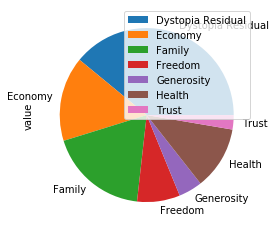

In [44]:
pv_melt.plot.pie(y = "value" )

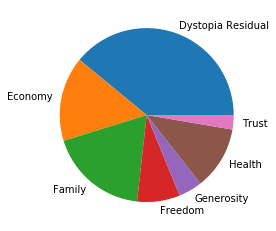

In [48]:
pv_melt.plot.pie(y = "value" , legend = False)
plt.ylabel("")
plt.show()

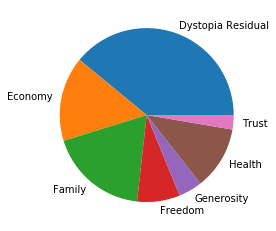

In [50]:
pv_melt.plot.pie(subplots = True, legend = False,)
plt.ylabel("")
plt.show()

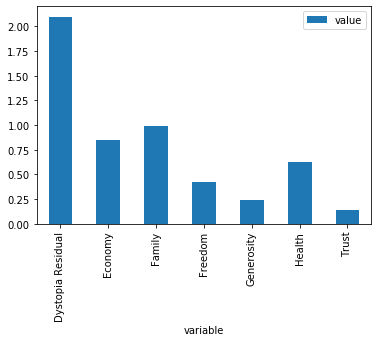

In [51]:
pv_melt.plot.bar()
plt.show()